## Imports
Execute the cell below to import all packages needed.

In [40]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
from emoji_extractor.extract import Extractor
from skimage import io

## Load csv into pandas dataframe

In [2]:
path_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'

joh_df = pd.read_csv(path_csv,index_col=None, header=0, low_memory = False).applymap(str)

## Extract & Count Emojis

In [4]:
extract = Extractor()

count = extract.count_all_emoji(joh_df['text'])

# Display most common
count.most_common()

[('üòÇ', 927229),
 ('üò≠', 190321),
 ('ü§£', 189896),
 ('üî•', 136057),
 ('üòç', 93776),
 ('‚ù§', 92624),
 ('üíî', 40228),
 ('üíÄ', 35877),
 ('üò©', 33553),
 ('üòÖ', 29872),
 ('üòä', 26942),
 ('üò¢', 25902),
 ('üôè', 19699),
 ('üëè', 19161),
 ('üôå', 18165),
 ('ü§î', 18054),
 ('üòÅ', 17479),
 ('üòπ', 16310),
 ('üíï', 15555),
 ('üëÄ', 14580),
 ('üôÑ', 14106),
 ('üíÉ', 13801),
 ('üòò', 13574),
 ('üëå', 13255),
 ('‚ô•', 12228),
 ('üôà', 11303),
 ('üôèüèæ', 10642),
 ('üòî', 10469),
 ('ü§ó', 10084),
 ('üíØ', 10079),
 ('üòí', 10067),
 ('‚ú®', 9350),
 ('üòè', 8063),
 ('üôåüèæ', 7998),
 ('üòÄ', 7802),
 ('üò±', 7756),
 ('üòâ', 7503),
 ('üòã', 7469),
 ('‚ò∫', 7467),
 ('üò•', 6992),
 ('üò≥', 6920),
 ('üòë', 6809),
 ('üéâ', 6540),
 ('üòé', 6472),
 ('üò´', 6364),
 ('üëèüèæ', 6361),
 ('üòÜ', 6204),
 ('üíú', 6182),
 ('üíñ', 5961),
 ('üôÉ', 5948),
 ('üòï', 5882),
 ('üò£', 5828),
 ('‚úä', 5809),
 ('üòÉ', 5762),
 ('üò™', 5734),
 ('üíõ', 5597),
 ('üò

## Create a Sorted Pandas DataFrame with Emoji Counts 

In [5]:
# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df

Emoji   Count
2148   üßñ‚Äç‚ôÇÔ∏è       1
859      üáªüáÆ       1
1991      ü•å       1
1990      ‚ôü       1
1752   üë©üèª‚Äçüè´       1
1753   üë©üèø‚Äçüî¨       1
1987   üë®‚Äç‚öñÔ∏è       1
1754  üë©üèº‚Äç‚öñÔ∏è       1
1984   üë±‚Äç‚ôÄÔ∏è       1
1768  üö£üèΩ‚Äç‚ôÄÔ∏è       1
866      üá≥üáÆ       1
1979     üëÇüèª       1
1978  üö¥üèº‚Äç‚ôÄÔ∏è       1
1977  ü§æüèº‚Äç‚ôÄÔ∏è       1
1772  üèÑüèæ‚Äç‚ôÄÔ∏è       1
1974     üßöüèæ       1
1972     ü§Ωüèª       1
1971     üèãüèª       1
1773  üö£üèæ‚Äç‚ôÄÔ∏è       1
1305   üë©üèΩ‚Äçüåæ       1
1965     ü§úüèº       1
1029     üá±üá∑       1
1303   üë©üèΩ‚Äçüî¨       1
1781  üôçüèª‚Äç‚ôÇÔ∏è       1
1302   üë®üèΩ‚Äçüöí       1
1783  üßùüèø‚Äç‚ôÄÔ∏è       1
1748  üôçüèº‚Äç‚ôÇÔ∏è       1
1784      ‚öó       1
857      üáªüá™       1
855      üáªüá¶       1
...     ...     ...
35        üíØ   10079
27        ü§ó   10084
48        üòî   10469
91       üôèüèæ   10642
80        üôà   11303
145       ‚ô•   12228
124       üëå   13255
30        üòò   13574
141       üíÉ   13801
2         üôÑ   14106
0         üëÄ   14580
24        üíï   15555
189       üòπ   16310
10        üòÅ   17479
22        ü§î   18054
110       üôå   18165
106       üëè   19161
169       üôè   19699
108       üò¢   25902
5         üòä   26942
15        üòÖ   29872
32        üò©   33553
117       üíÄ   35877
38        üíî   40228
17        ‚ù§   92624
23        üòç   93776
33        üî•  136057
44        ü§£  189896
25        üò≠  190321
1         üòÇ  927229

[2149 rows x 2 columns]

## Top 20 Emojis Graph

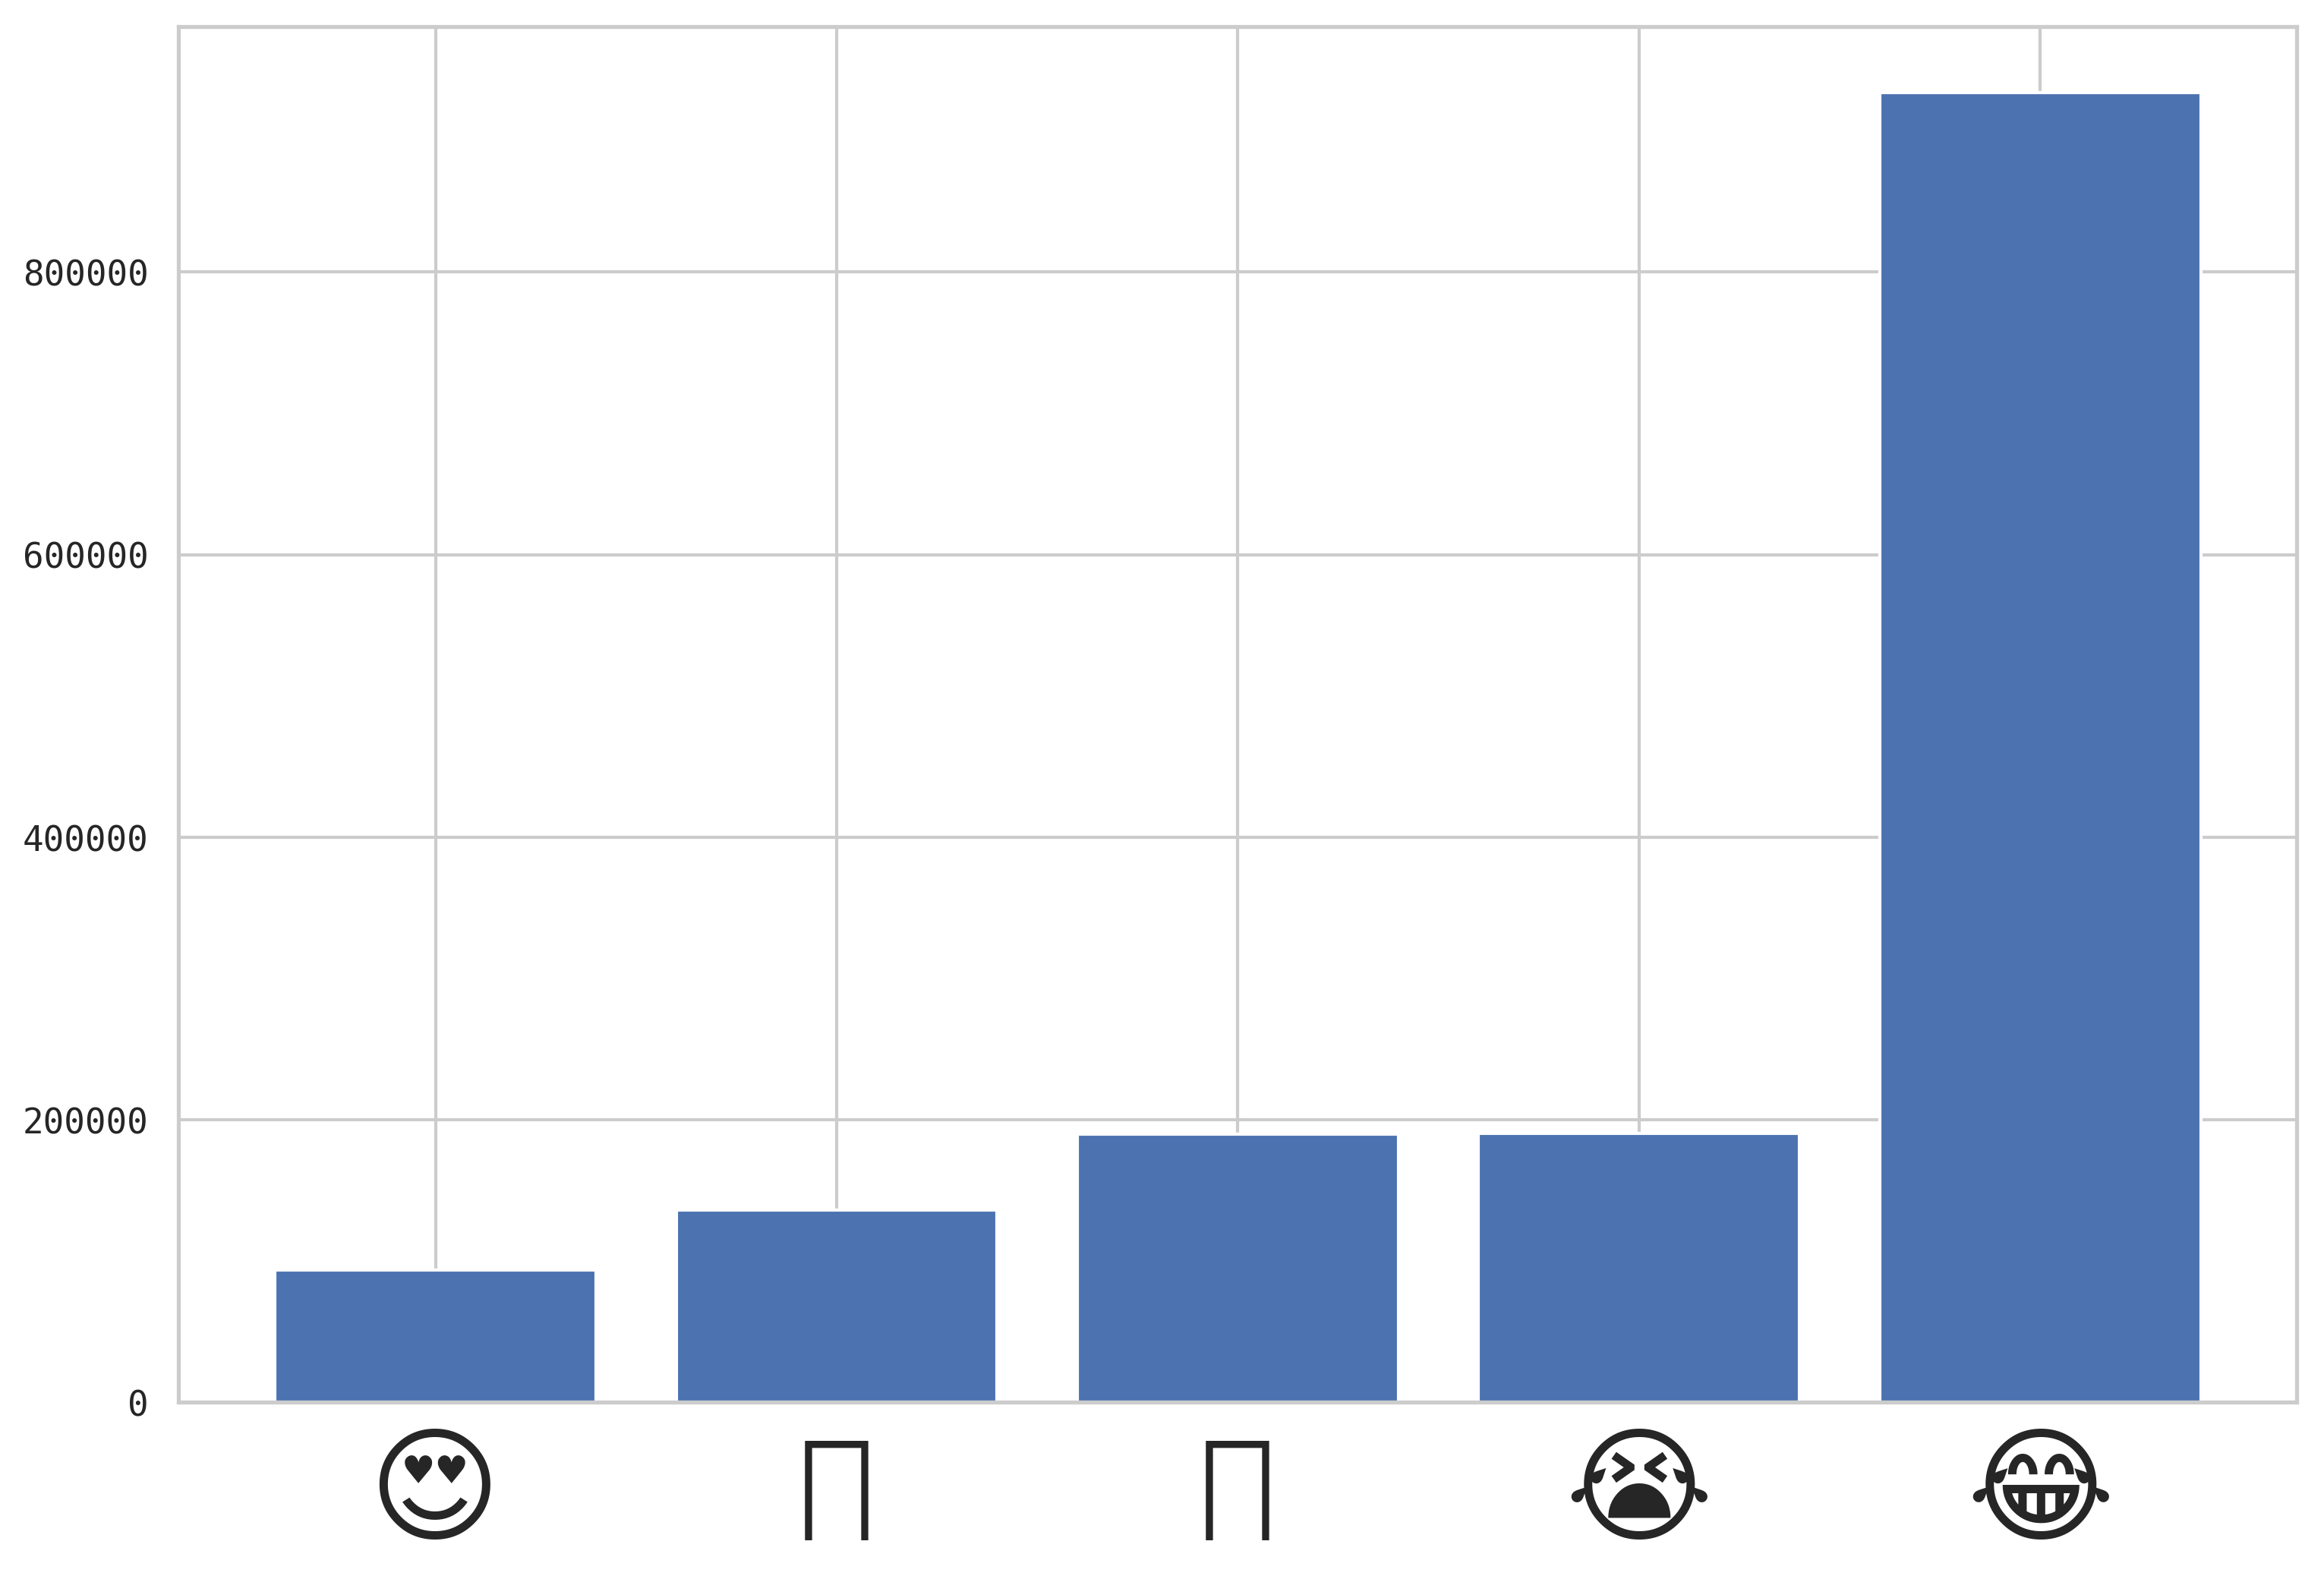

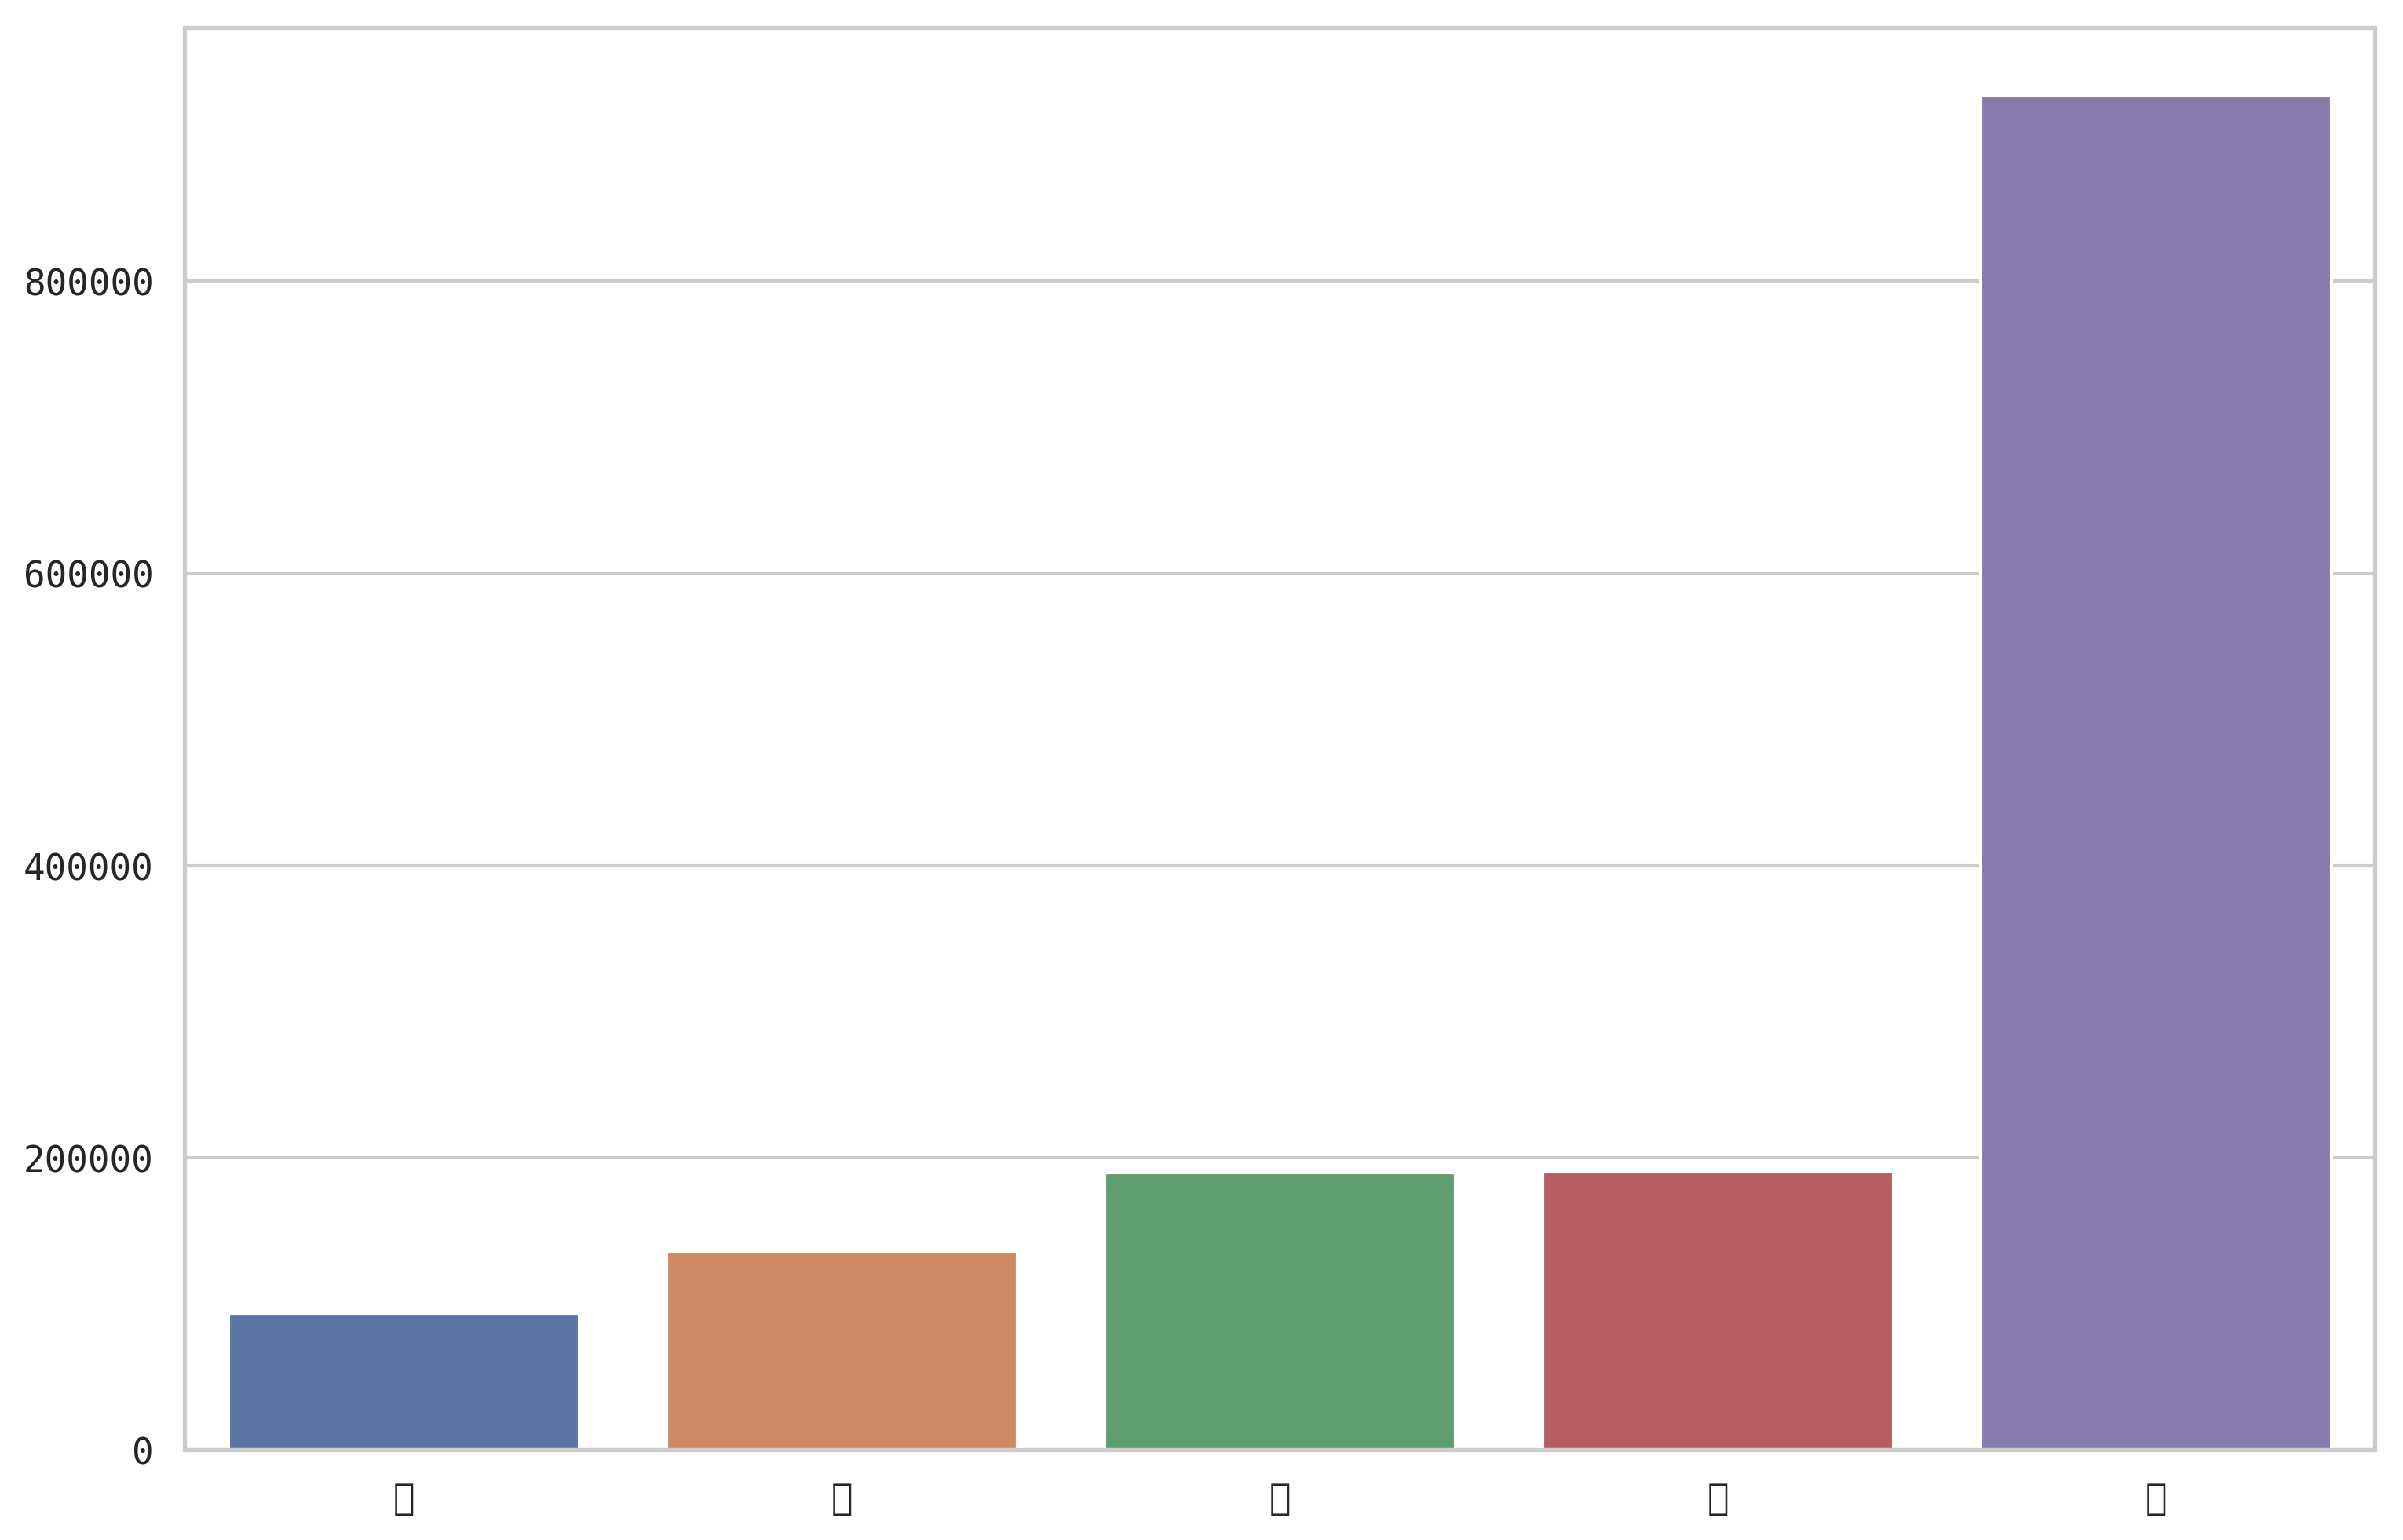

In [81]:
x = emojis_count_df['Emoji'].tail(5).values
y = emojis_count_df['Count'].tail(5).values


plt.rcParams['font.size'] = 20
plt.rcParams["font.monospace"] = ["DejaVu Sans Mono"]
plt.rcParams["font.family"] = "monospace"


plt.bar(x, y, width=0.8, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x,x,fontname='',fontsize=40)
plt.show()

sns.barplot(x=x,y=y) 